In [ ]:
%pip install numpy matplotlib


In [26]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TypeError: ecg_plot() got an unexpected keyword argument 'ax'

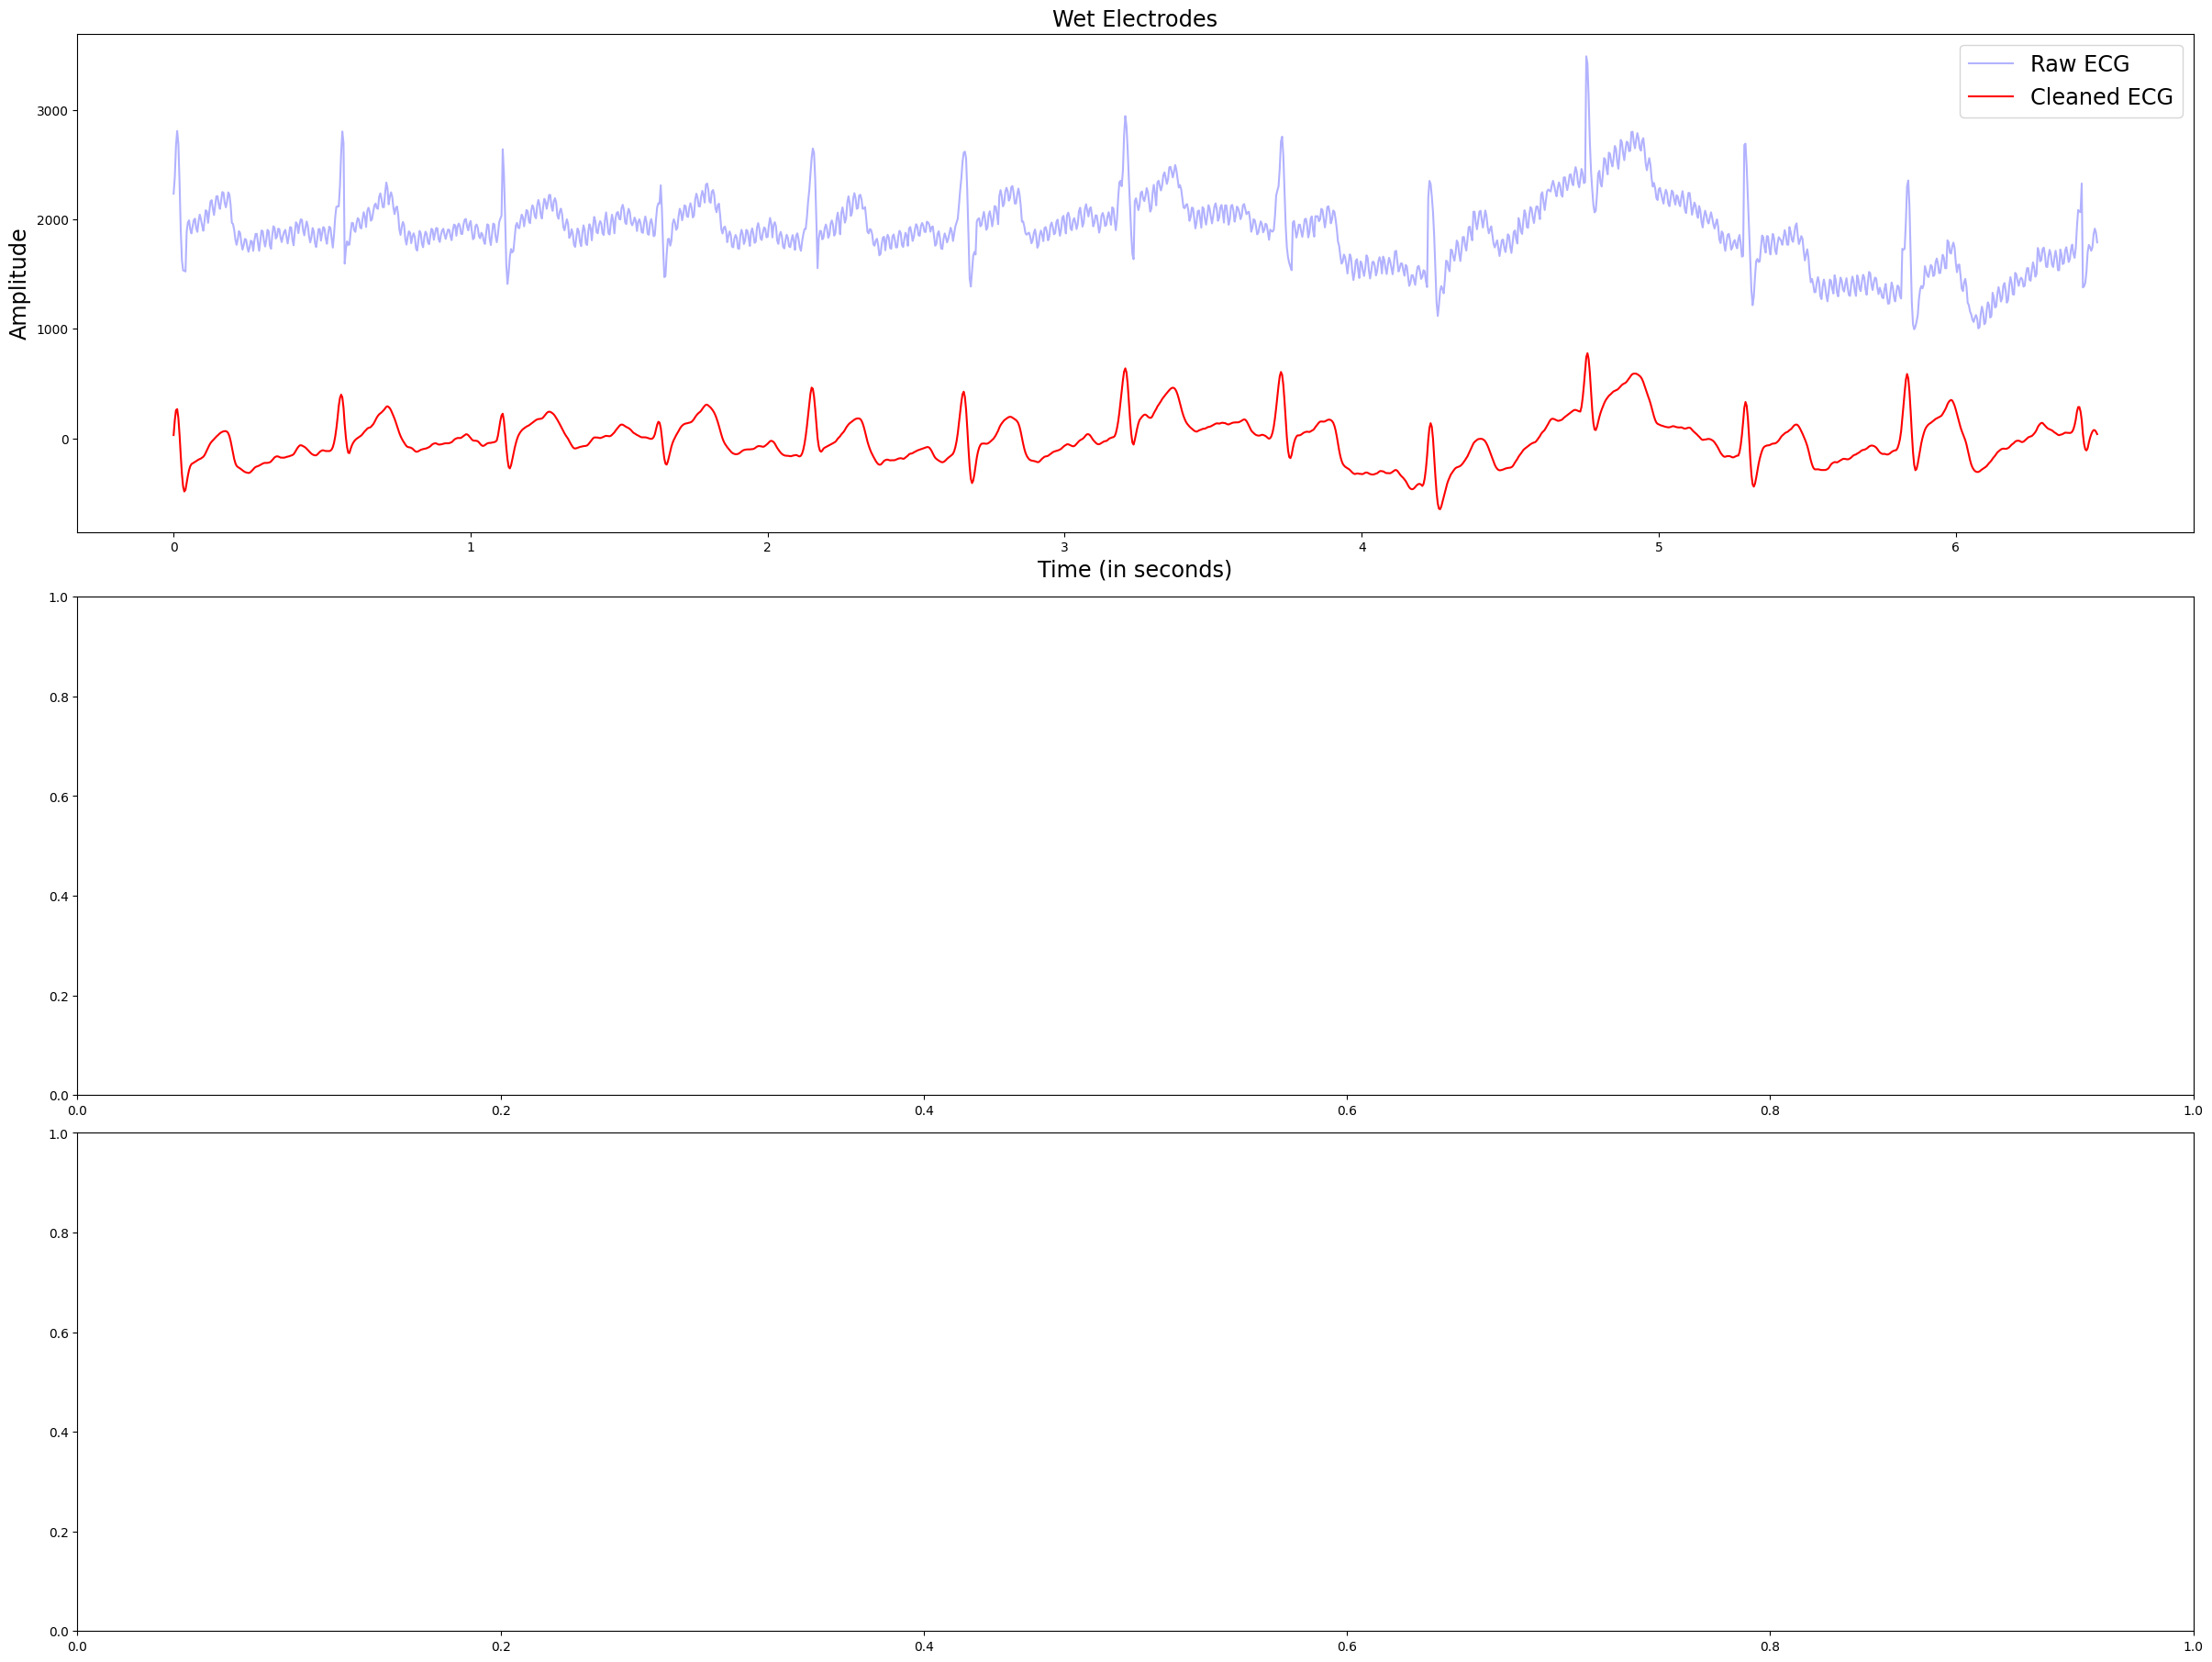

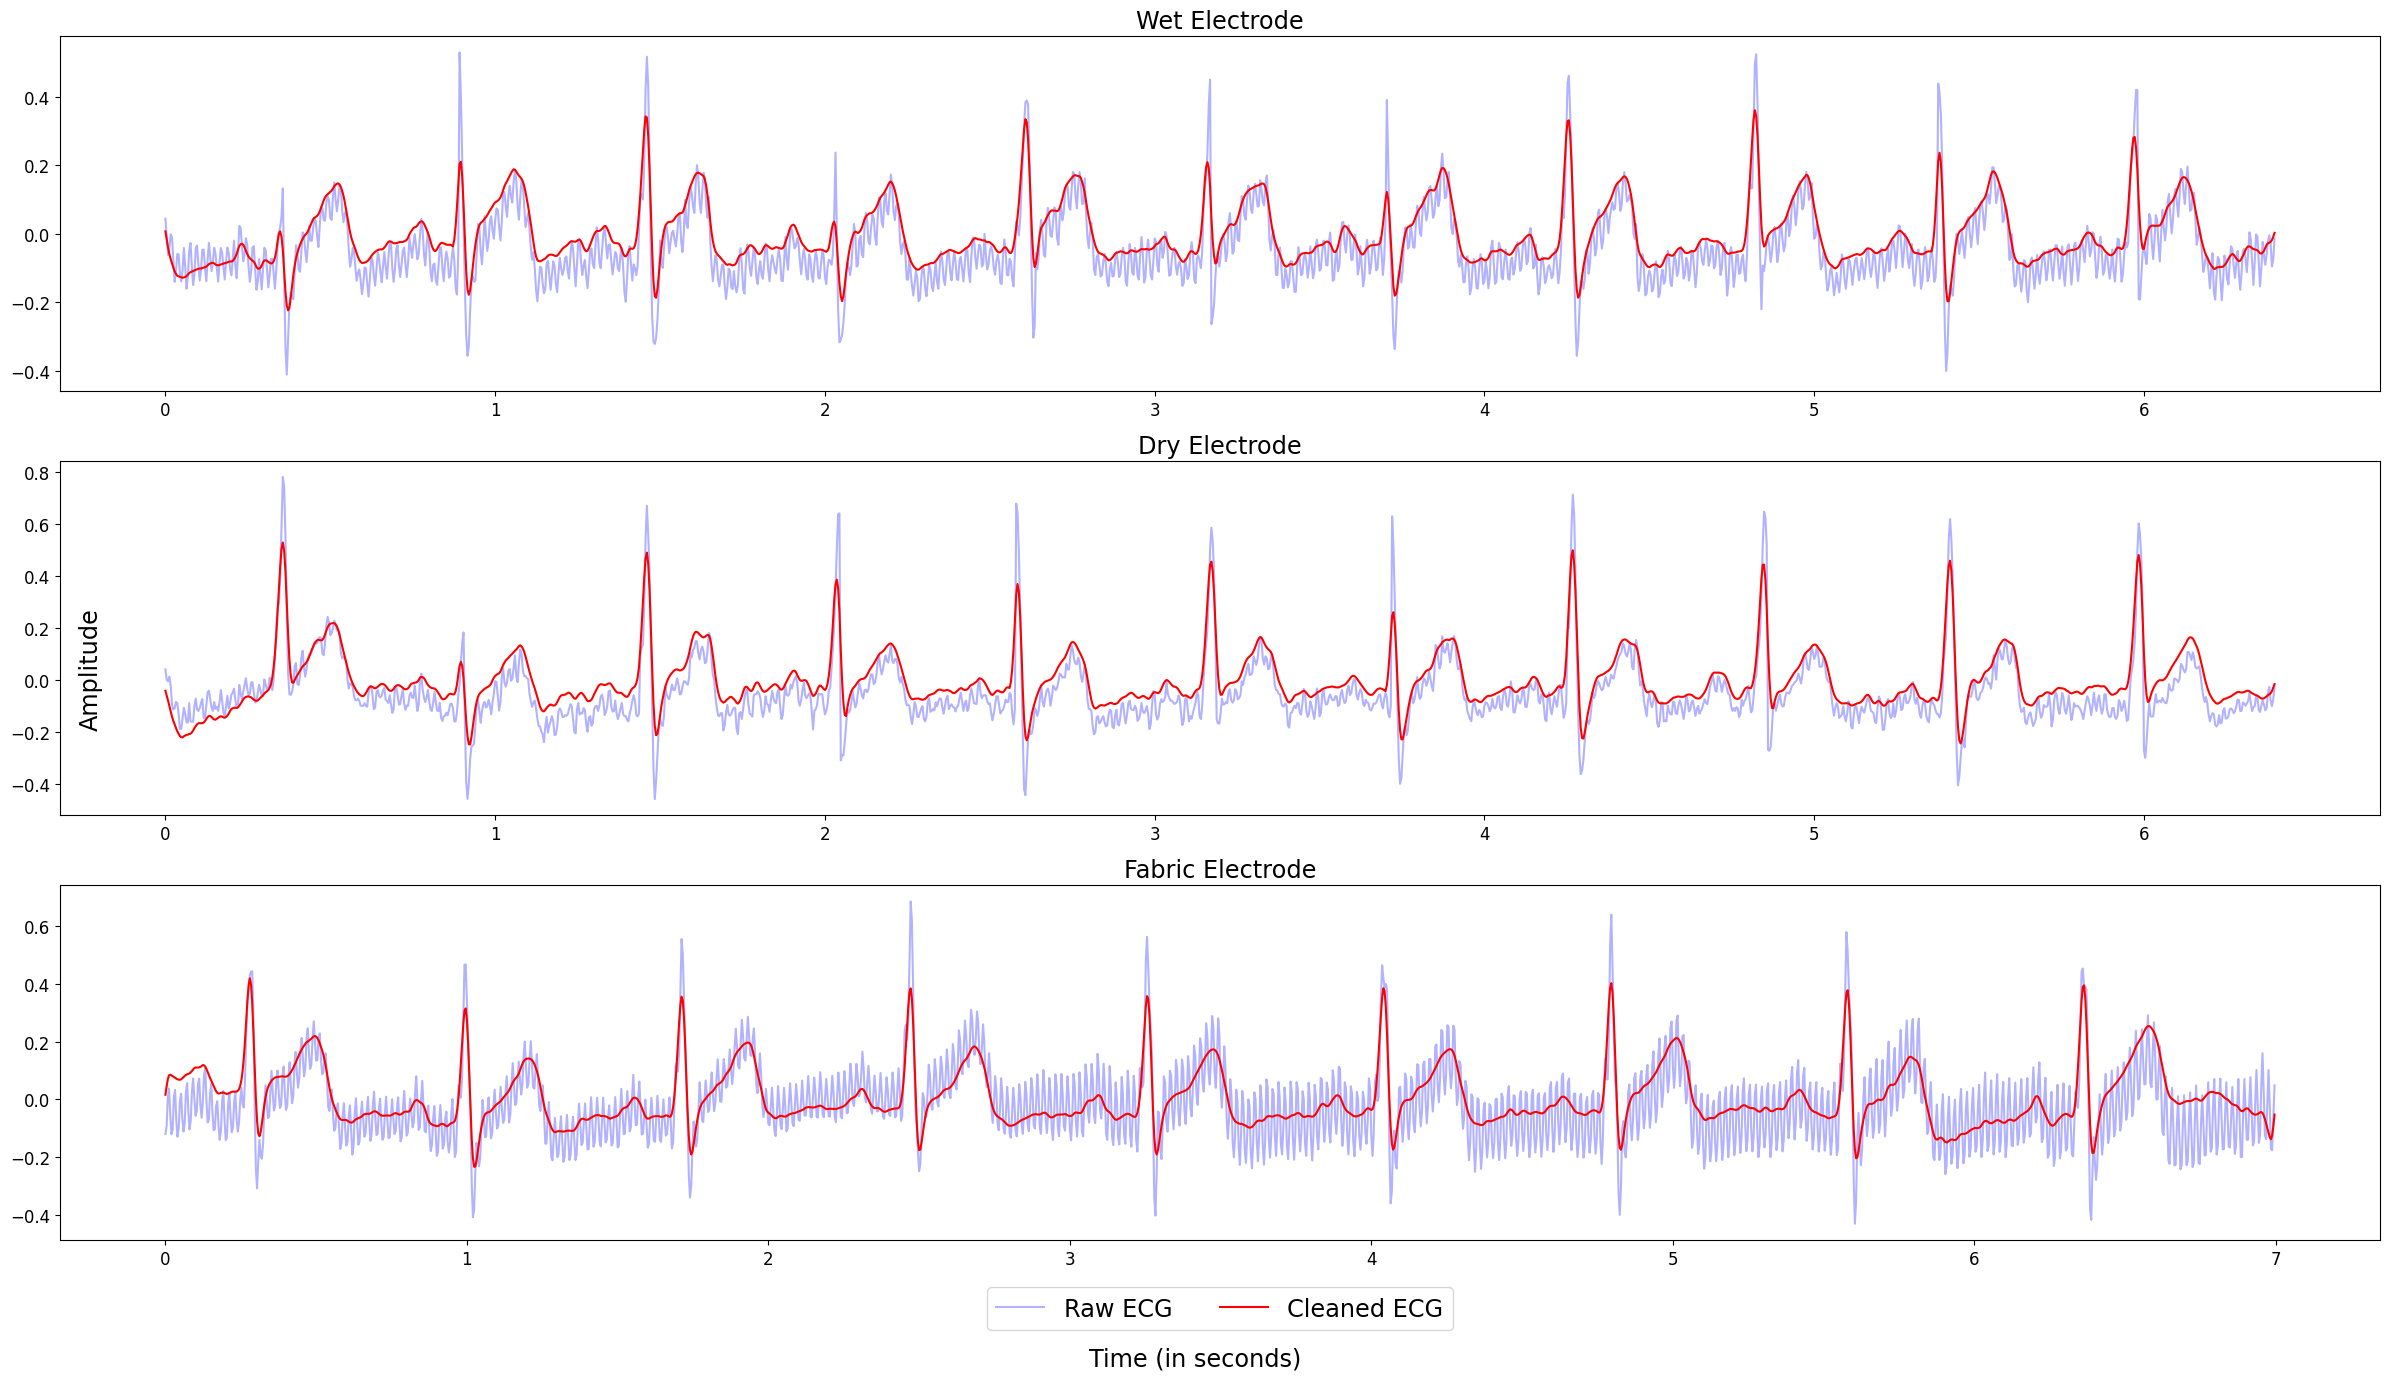

Text(0.5, 0.98, 'Fabric Electrode - ECG Processed')

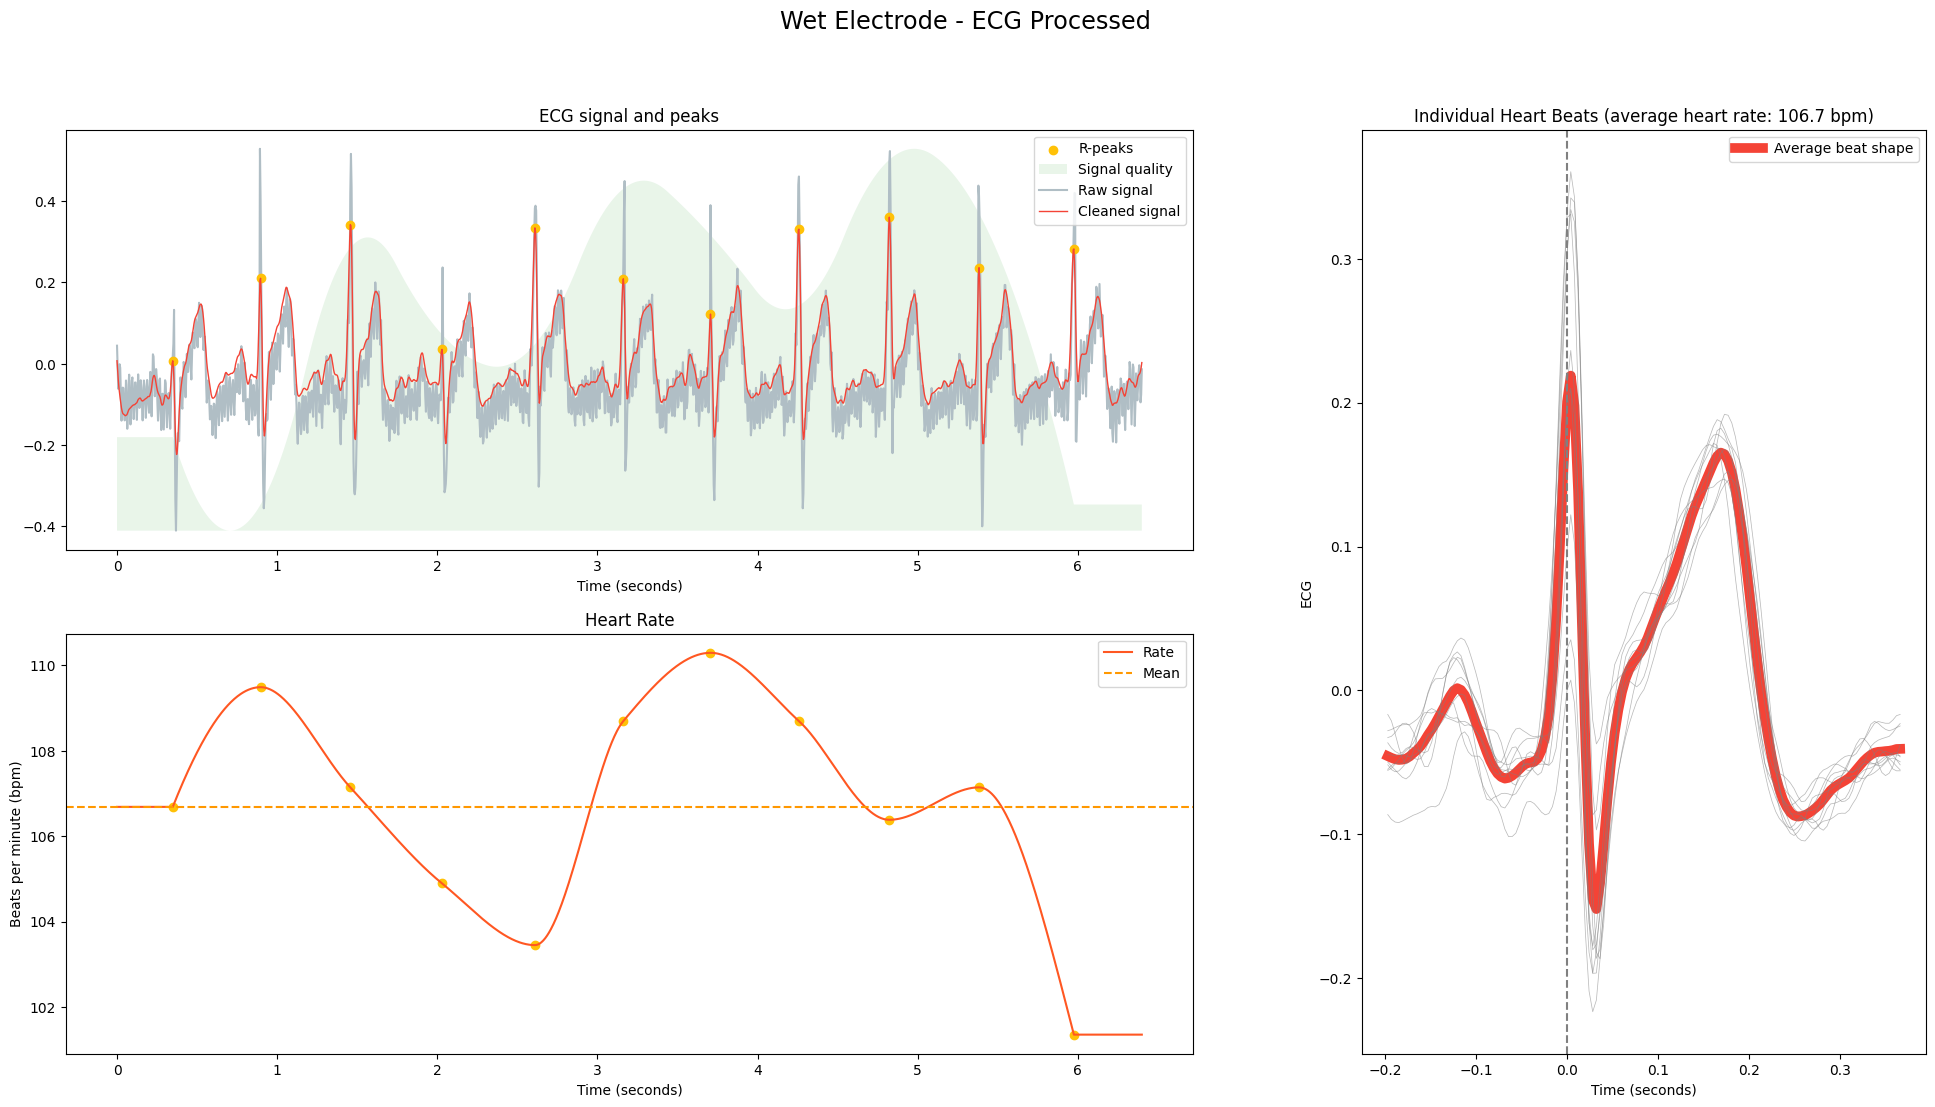

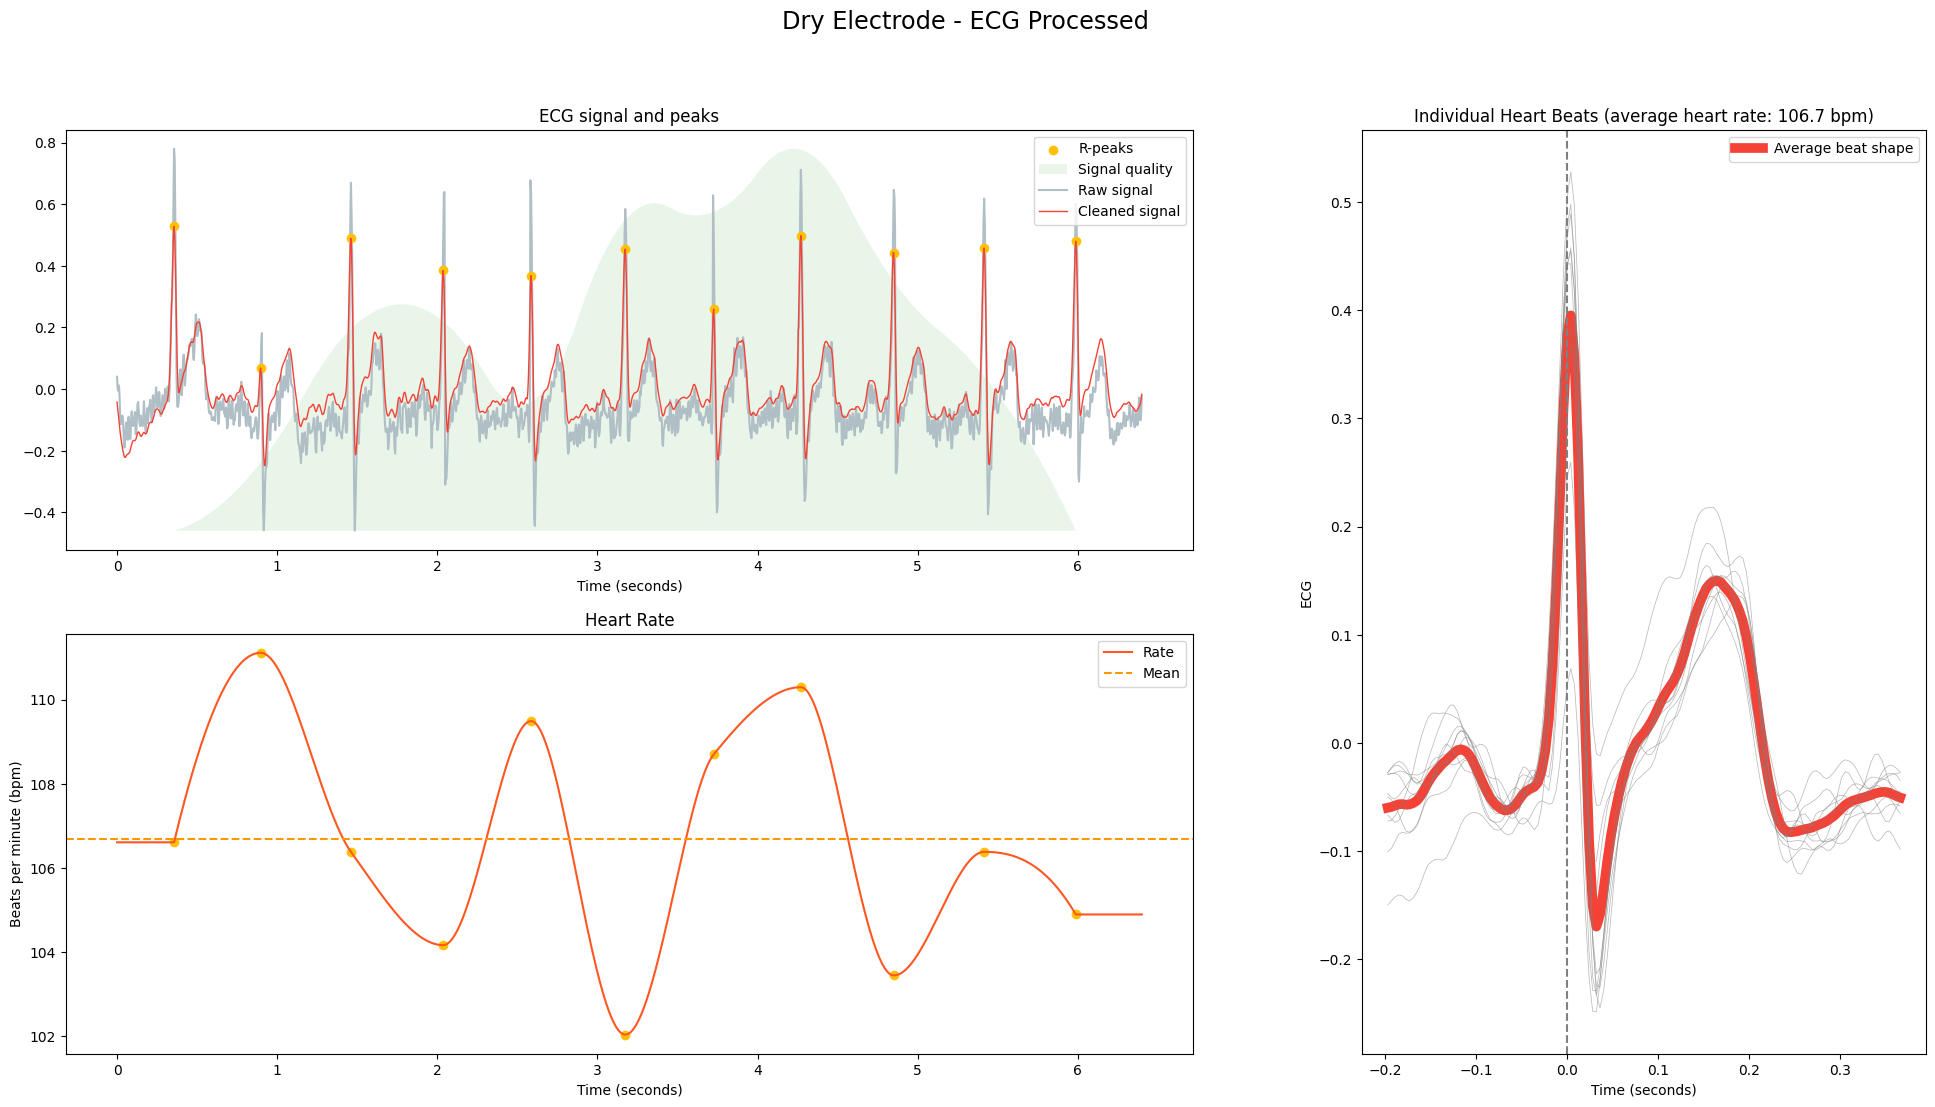

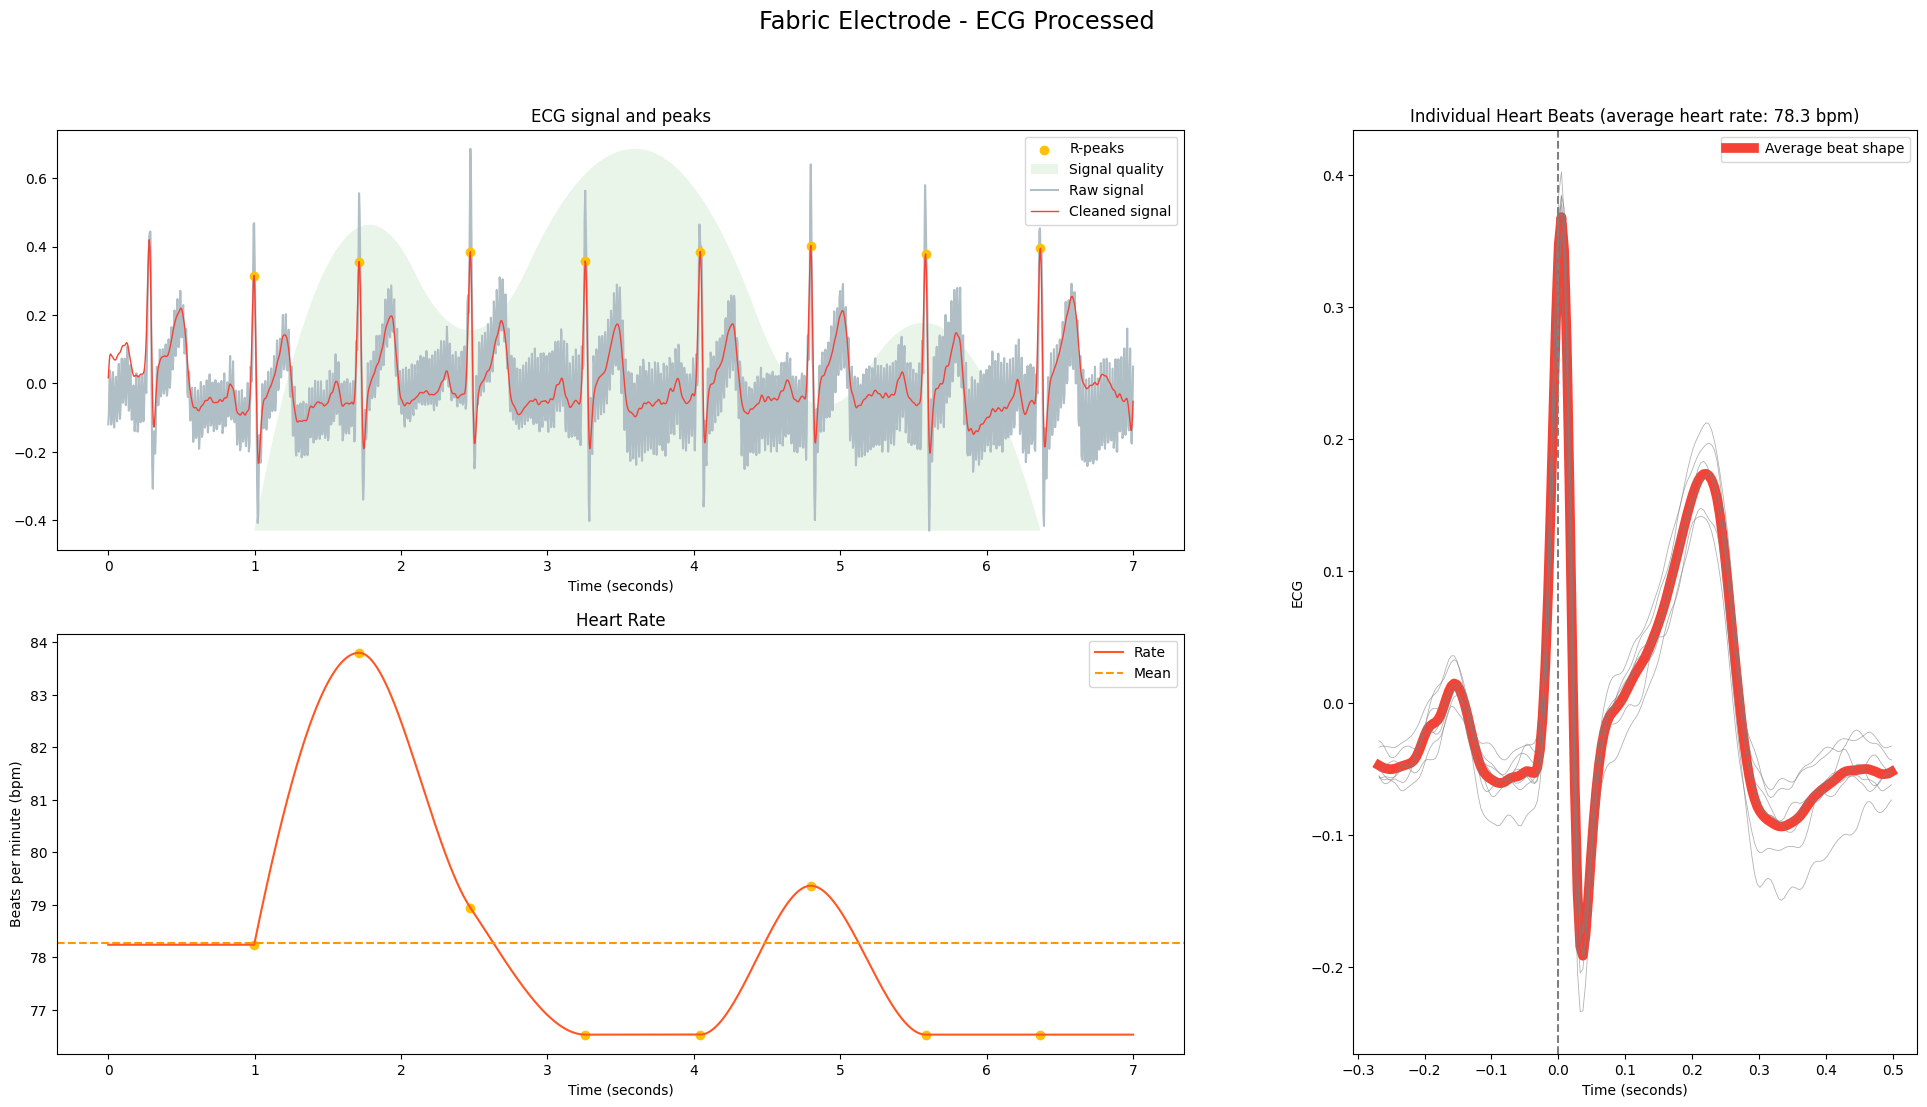

In [108]:
# read data from ecg.txt
data = pd.read_csv('ecg2.txt', delimiter='\t')

ecg3 = data.values[:, 0]

# read data from json file which has array and comma separated values
import json
with open('gel_data.json') as f:
    data = json.load(f)
    ecg = np.array(data)
with open('dry_data.json') as f2:
    data2 = json.load(f2)
    ecg2 = np.array(data2)

def ecg_ggel(ecg):
    if ecg.max() > 100:
            ecg = (ecg - 2000) / (40 * 40)
    return ecg

ecg = ecg_ggel(ecg)
ecg2 = ecg_ggel(ecg2)
ecg3 = ecg_ggel(ecg3)

ecg = ecg[2500:4100]
ecg2 = ecg2[2500:4100]
ecg3 = ecg3[250:2000]

def ecg_gg(ecg):
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="neurokit")
    x_og = np.arange(len(ecg))  # Original x-axis indices
    x_seconds = x_og / 250  # Convert to seconds
    return x_seconds, ecg_cleaned

x_seconds, ecg_cleaned = ecg_gg(ecg)
x_seconds2, ecg_cleaned2 = ecg_gg(ecg2)
x_seconds3, ecg_cleaned3 = ecg_gg(ecg3)

plt.figure(figsize=(24, 15))

# Plot Wet Electrode
plt.subplot(3, 1, 1)
plt.plot(x_seconds, ecg, alpha=0.3, color='blue', label='Raw ECG')
plt.plot(x_seconds, ecg_cleaned, alpha=1, color='red', label='Cleaned ECG')
plt.title('Wet Electrode', fontsize='xx-large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot Dry Electrode
plt.subplot(3, 1, 2)
plt.plot(x_seconds2, ecg2, alpha=0.3, color='blue')
plt.plot(x_seconds2, ecg_cleaned2, alpha=1, color='red')
plt.title('Dry Electrode', fontsize='xx-large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot Fabric Electrode
plt.subplot(3, 1, 3)
plt.plot(x_seconds3, ecg3, alpha=0.3, color='blue')
plt.plot(x_seconds3, ecg_cleaned3, alpha=1, color='red')
plt.title('Fabric Electrode', fontsize='xx-large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add universal labels and legend
plt.gcf().text(0.5, 0.04, 'Time (in seconds)', ha='center', va='center', fontsize='xx-large')
plt.gcf().text(0.04, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical', fontsize='xx-large')
plt.legend(['Raw ECG', 'Cleaned ECG'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize='xx-large')

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Leave space for universal labels and legend
plt.show()




# Plot both raw and cleaned ECG signals
# plt.figure(figsize=(24, 8))
# plt.plot(x_seconds, ecg, alpha=0.3, color='blue', label='Raw ECG')  # Use x_seconds
# plt.plot(x_seconds, ecg_cleaned, alpha=1, color='red', label='Cleaned ECG')  # Use x_seconds
# # plt.title('Raw and Cleaned ECG Fabric Electrode')
# plt.xlabel('Time (in seconds)')
# plt.ylabel('Amplitude')
# # increase legend size
# plt.legend(fontsize='xx-large')
# plt.show()



signals, info = nk.ecg_process(ecg, sampling_rate=250)
# print(signals)
# print(signals['ECG_Phase_Completion_Atrial'])
# ECG_Phase_Completion_Atrial where score is greater than 0.0
# print(signals['ECG_Phase_Atrial'] == 1)

# # signals, info = nk.ecg_peaks(ecg, sampling_rate=250, correct_artifacts=True, show=True)
# Define a new function
def my_processing(ecg_signal):
    # Do processing
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=250, method="neurokit")
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=250)
    rate = nk.ecg_rate(rpeaks, sampling_rate=250, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=250)

    # Prepare output
    signals = pd.DataFrame({"ECG_Raw": ecg_signal,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})
    signals = pd.concat([signals, instant_peaks], axis=1)

    # Create info dict
    info = rpeaks
    info["sampling_rate"] = 250
    
    return signals, info

# signals, info = my_processing(ecg)

# nk.ecg_plot(signals, info)
# fig = plt.gcf()
# fig.set_size_inches(24, 12, forward=True)
# # legend size
# plt.legend(fontsize='xx-large')

# Process and plot ECG for Wet Electrode
signals, info = my_processing(ecg)
nk.ecg_plot(signals, info)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)
fig.suptitle('Wet Electrode - ECG Processed', fontsize='xx-large', y=0.98)  # Add title with large font size

# Process and plot ECG for Dry Electrode
signals, info = my_processing(ecg2)
nk.ecg_plot(signals, info)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)
fig.suptitle('Dry Electrode - ECG Processed', fontsize='xx-large', y=0.98)  # Add title with large font size

# Process and plot ECG for Fabric Electrode
signals, info = my_processing(ecg3)
nk.ecg_plot(signals, info)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)
fig.suptitle('Fabric Electrode - ECG Processed', fontsize='xx-large', y=0.98)  # Add title with large font size




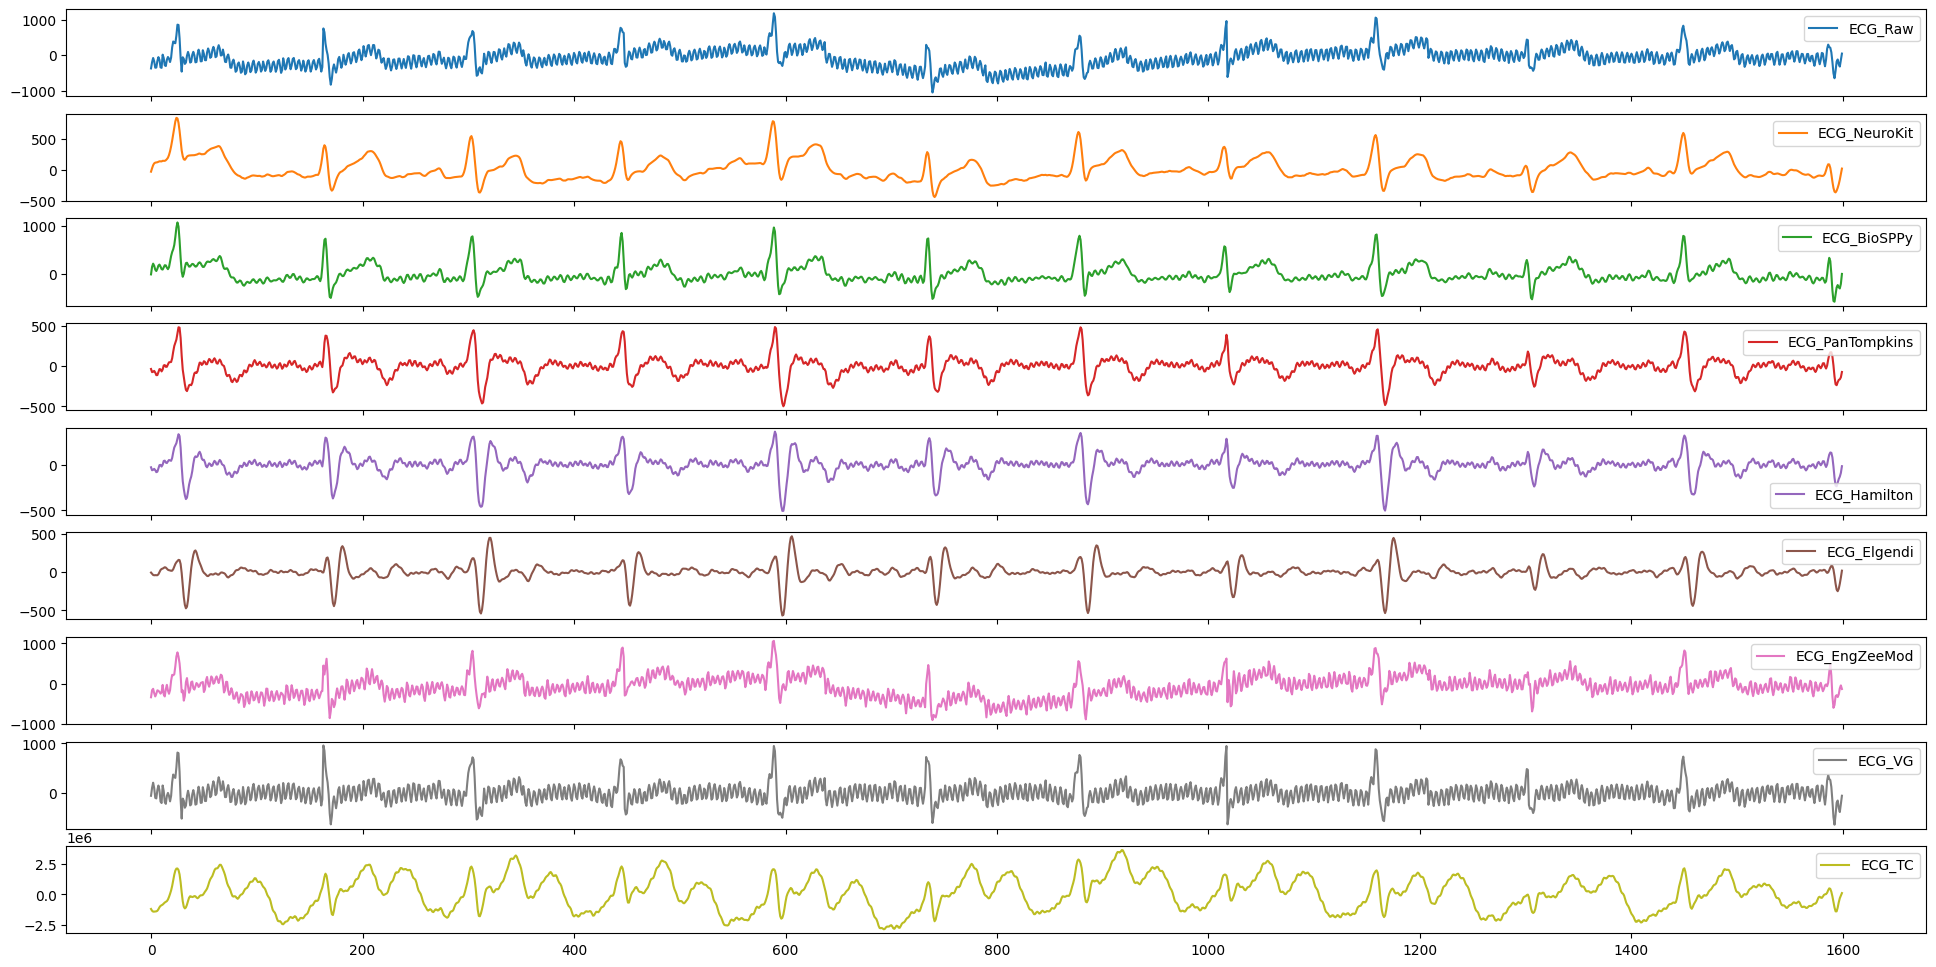

In [60]:
signals = pd.DataFrame({

    "ECG_Raw" : ecg,

    "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=250, method="neurokit"),

    "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=250, method="biosppy"),

    "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985"),

    "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=250, method="hamilton2002"),

    "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010"),

    "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=250, method="engzeemod2012"),

    "ECG_VG" : nk.ecg_clean(ecg, sampling_rate=250, method="vg"),

    "ECG_TC" : nk.ecg_clean(ecg, sampling_rate=250, method="templateconvolution")

})



signals.plot(subplots=True)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)

Excellent


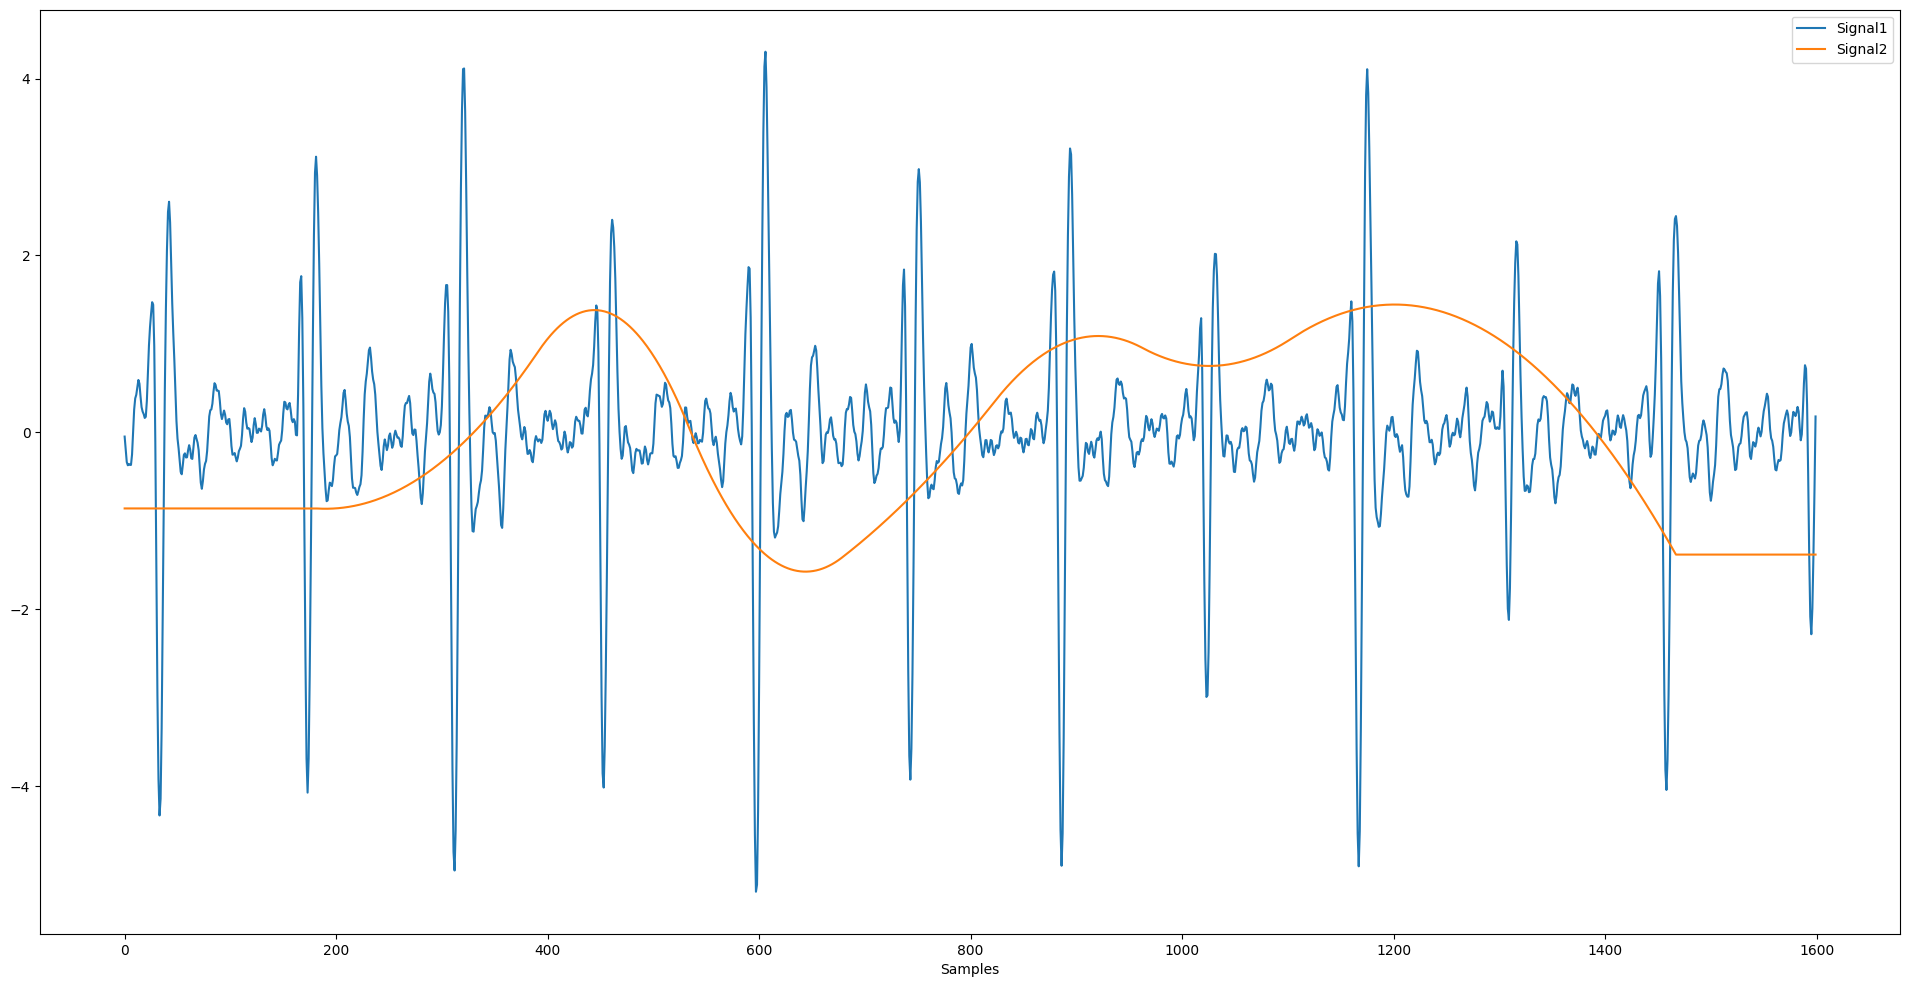

In [61]:
## Verification of the quality of the ECG signal
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010")

quality = nk.ecg_quality(ecg_cleaned, sampling_rate=250)

nk.signal_plot([ecg_cleaned, quality], standardize=True)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)
# @savefig p_signal_plot1.png scale=100%
print(nk.ecg_quality(ecg_cleaned,

               sampling_rate=250,

               method="zhao2018",

               approach="fuzzy"))

## Extract and Visualize Individual Heartbeats

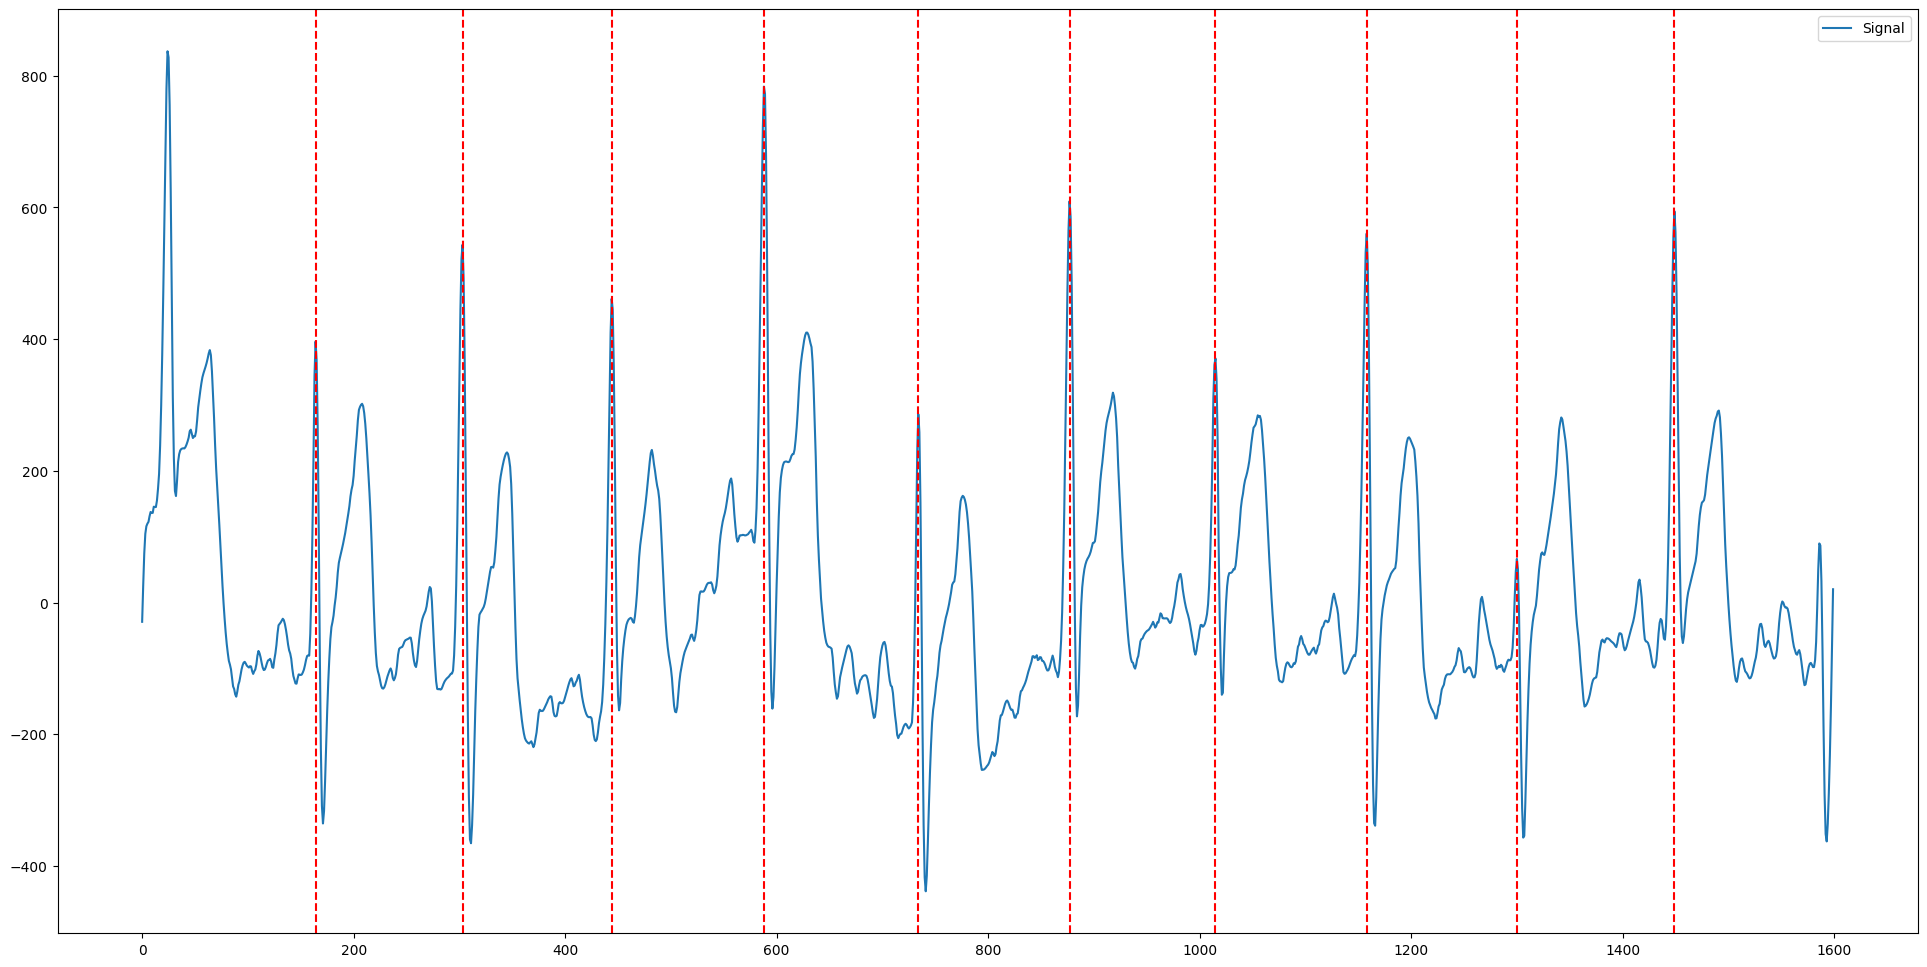

In [62]:
signals, info = nk.ecg_process(ecg, sampling_rate=250)
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

# Create a figure with a larger size
nk.events_plot(rpeaks, cleaned_ecg)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)

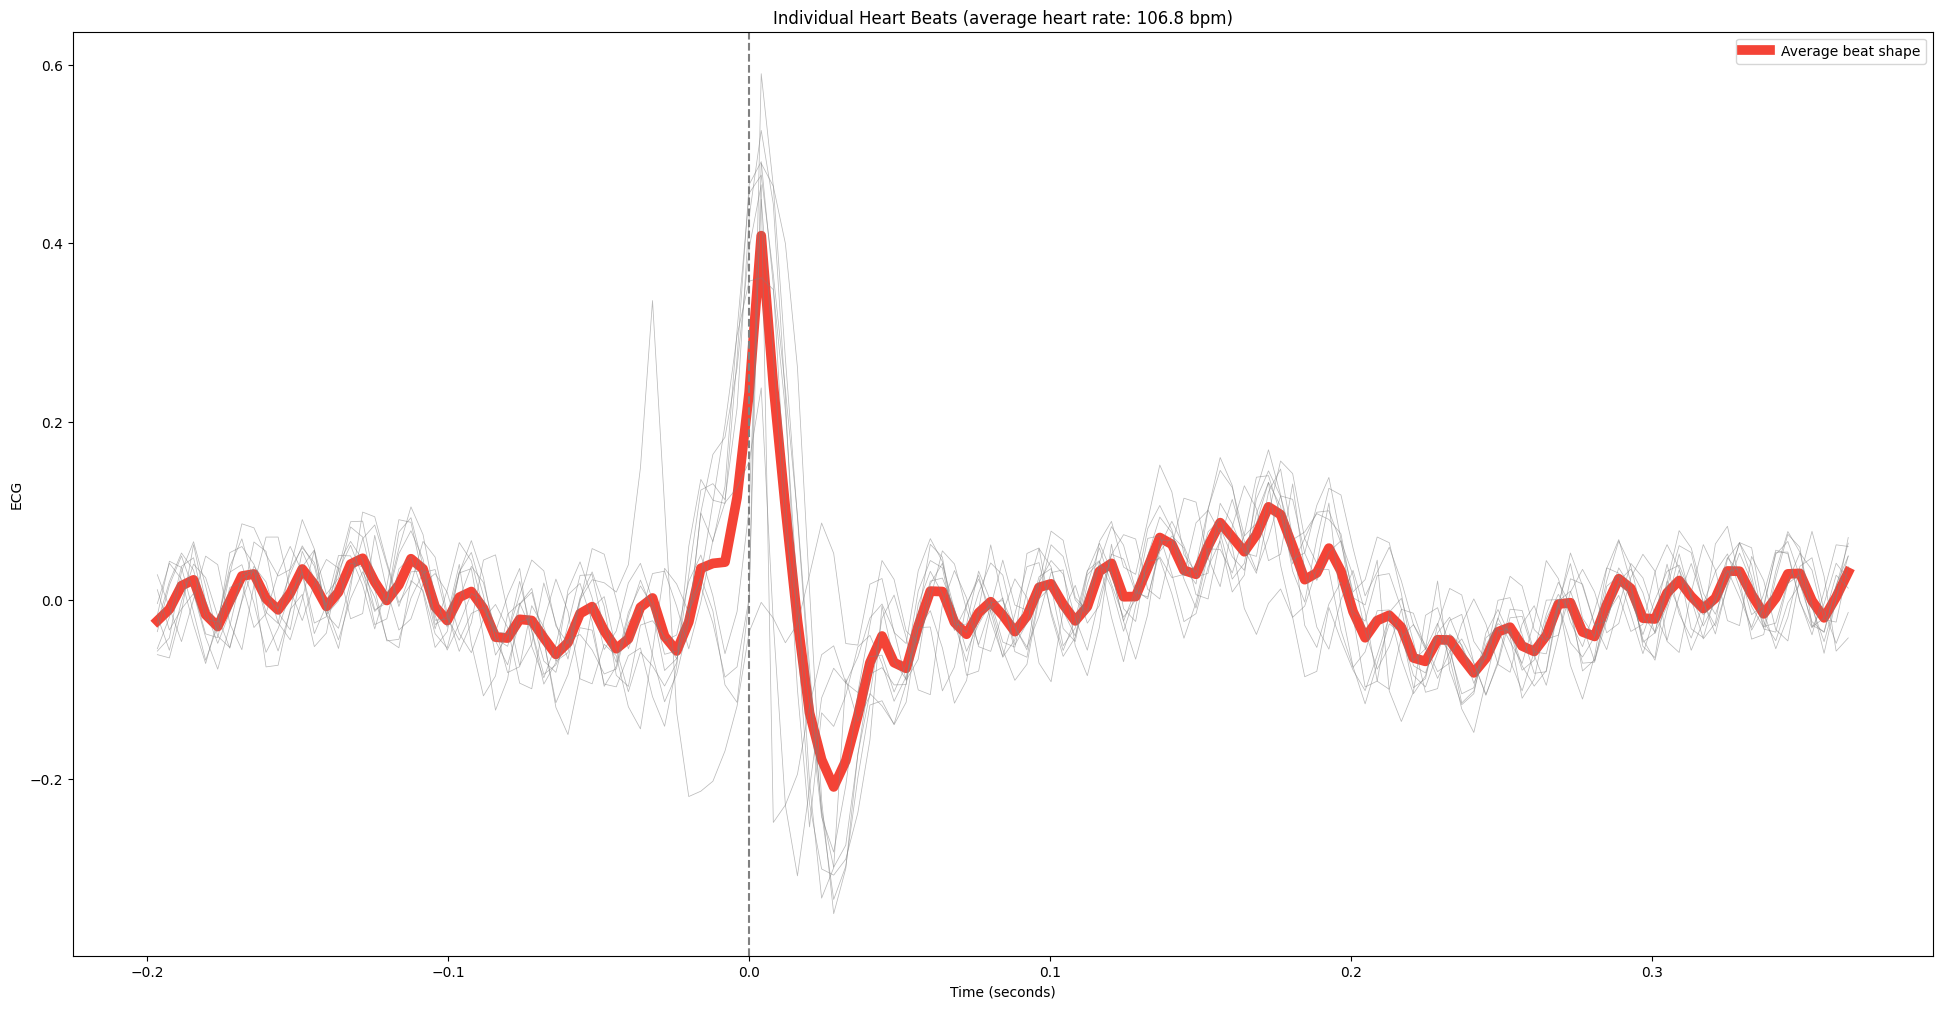

In [99]:
cleaned_ecg = nk.ecg_clean(ecg, sampling_rate=250, method="vg")
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=250, show=True)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)

In [100]:
# Define a function to create epochs
def extract_heartbeats(cleaned, peaks, sampling_rate=None): 
    heartbeats = nk.epochs_create(cleaned, 
                                  events=peaks, 
                                  epochs_start=-0.3, 
                                  epochs_end=0.4, 
                                  sampling_rate=sampling_rate)
    heartbeats = nk.epochs_to_df(heartbeats)
    return heartbeats
    
heartbeats = extract_heartbeats(cleaned_ecg, peaks=rpeaks, sampling_rate=250)
heartbeats.head()

Signal  Index Label      Time
0  0.237760     89     1 -0.300000
1 -0.024900     90     1 -0.295977
2 -0.229779     91     1 -0.291954
3 -0.308817     92     1 -0.287931
4 -0.210810     93     1 -0.283908

In [101]:
heartbeats_pivoted = heartbeats.pivot(index='Time', columns='Label', values='Signal')
heartbeats_pivoted.head()

Label             1        10         2         3         4         5  \
Time                                                                    
-0.300000  0.237760 -0.068904 -0.235529 -0.228071 -0.202775 -0.299662   
-0.295977 -0.024900 -0.006367 -0.299162 -0.301068 -0.168915 -0.088170   
-0.291954 -0.229779  0.043362 -0.274388 -0.307965 -0.118627 -0.135547   
-0.287931 -0.308817  0.046574 -0.173126 -0.290104 -0.035643 -0.106824   
-0.283908 -0.210810  0.007060 -0.082895 -0.238171 -0.002434 -0.020141   

Label             6         7         8         9  
Time                                               
-0.300000 -0.004307  0.044452 -0.012236 -0.006490  
-0.295977 -0.034548  0.036304 -0.063913 -0.055269  
-0.291954 -0.089934 -0.027685 -0.044488 -0.089769  
-0.287931 -0.066081 -0.026852  0.052336 -0.071833  
-0.283908  0.018280  0.032591  0.058482  0.001702

In [102]:
import numpy as np

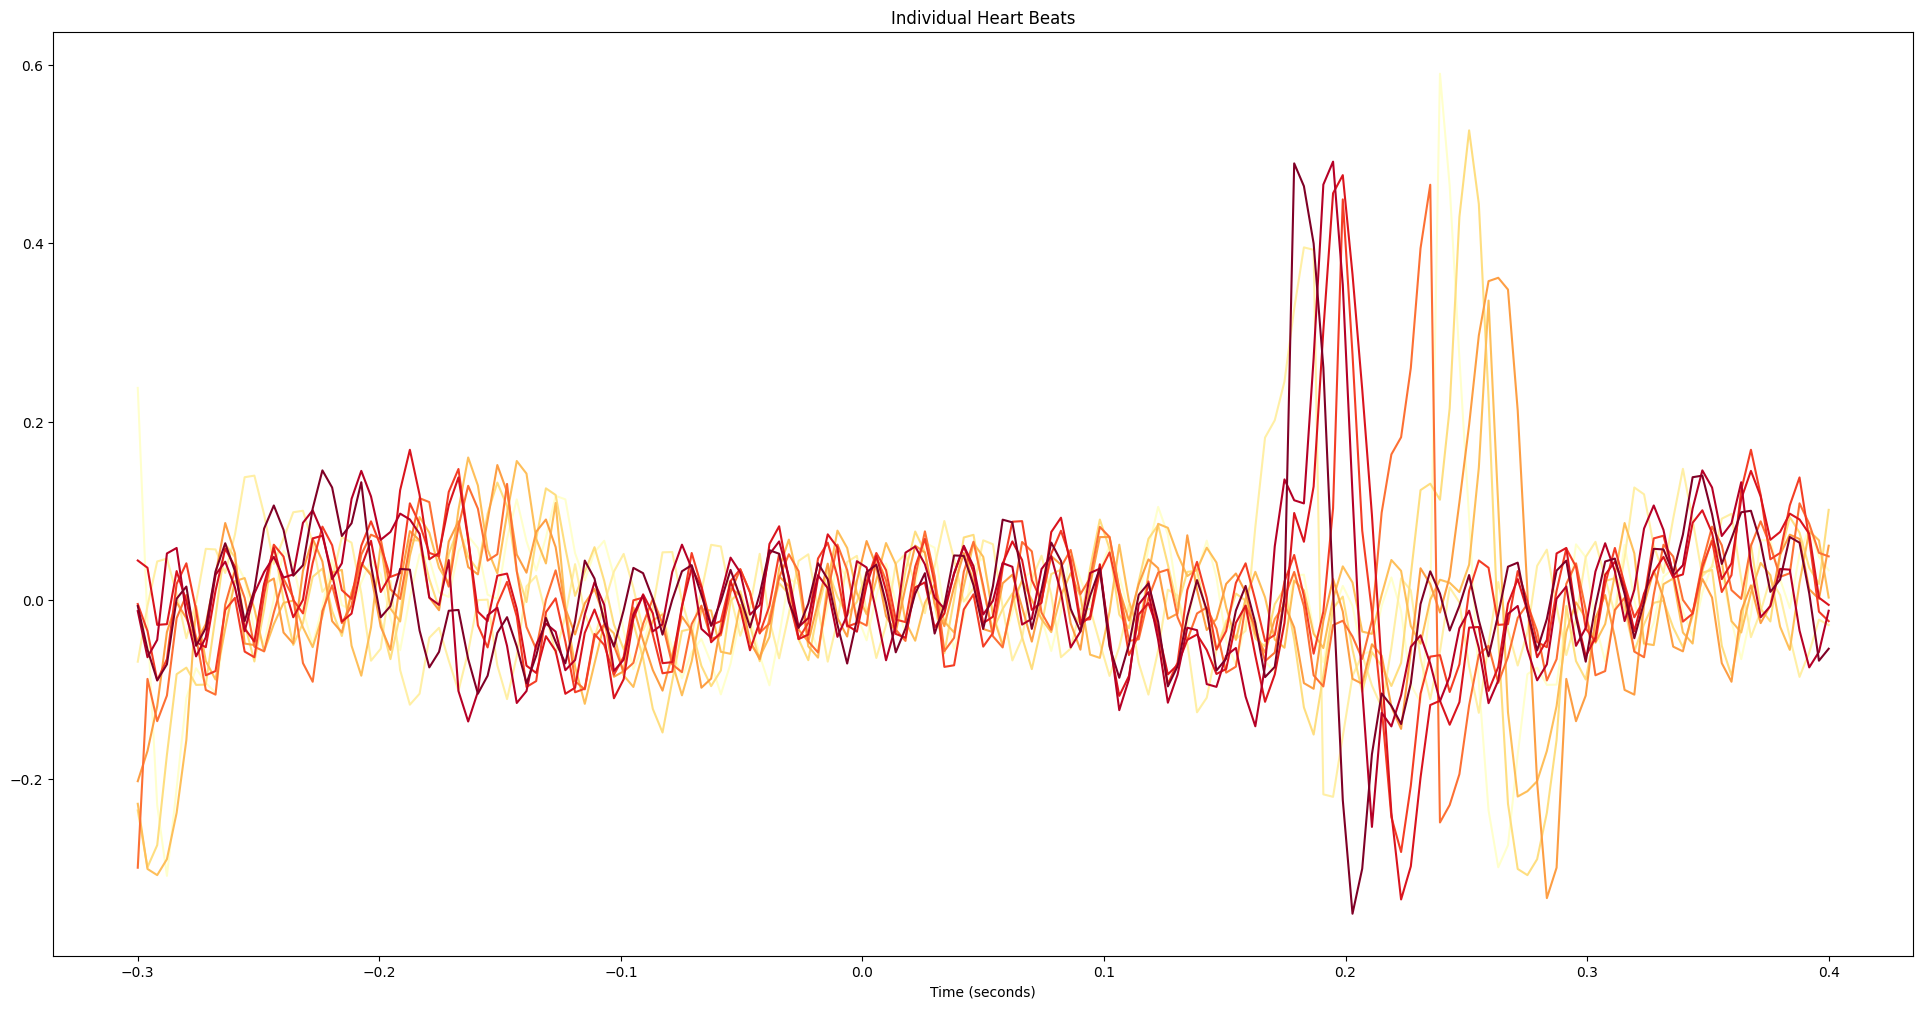

In [103]:
# Prepare figure
fig, ax = plt.subplots()

ax.set_title("Individual Heart Beats")
ax.set_xlabel("Time (seconds)")

# Aesthetics
labels = list(heartbeats_pivoted)
labels = ['Channel ' + x for x in labels] # Set labels for each signal
cmap = iter(plt.cm.YlOrRd(np.linspace(0,1, int(heartbeats["Label"].nunique())))) # Get color map
lines = [] # Create empty list to contain the plot of each signal

for i, x, color in zip(labels, heartbeats_pivoted, cmap):
    line, = ax.plot(heartbeats_pivoted[x], label='%s' % i, color=color)
    lines.append(line)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)

In [ ]:
pip install mplcursors

   -0.078125
0  -0.111250
1  -0.140000
2  -0.126875
3  -0.119375
4  -0.140000


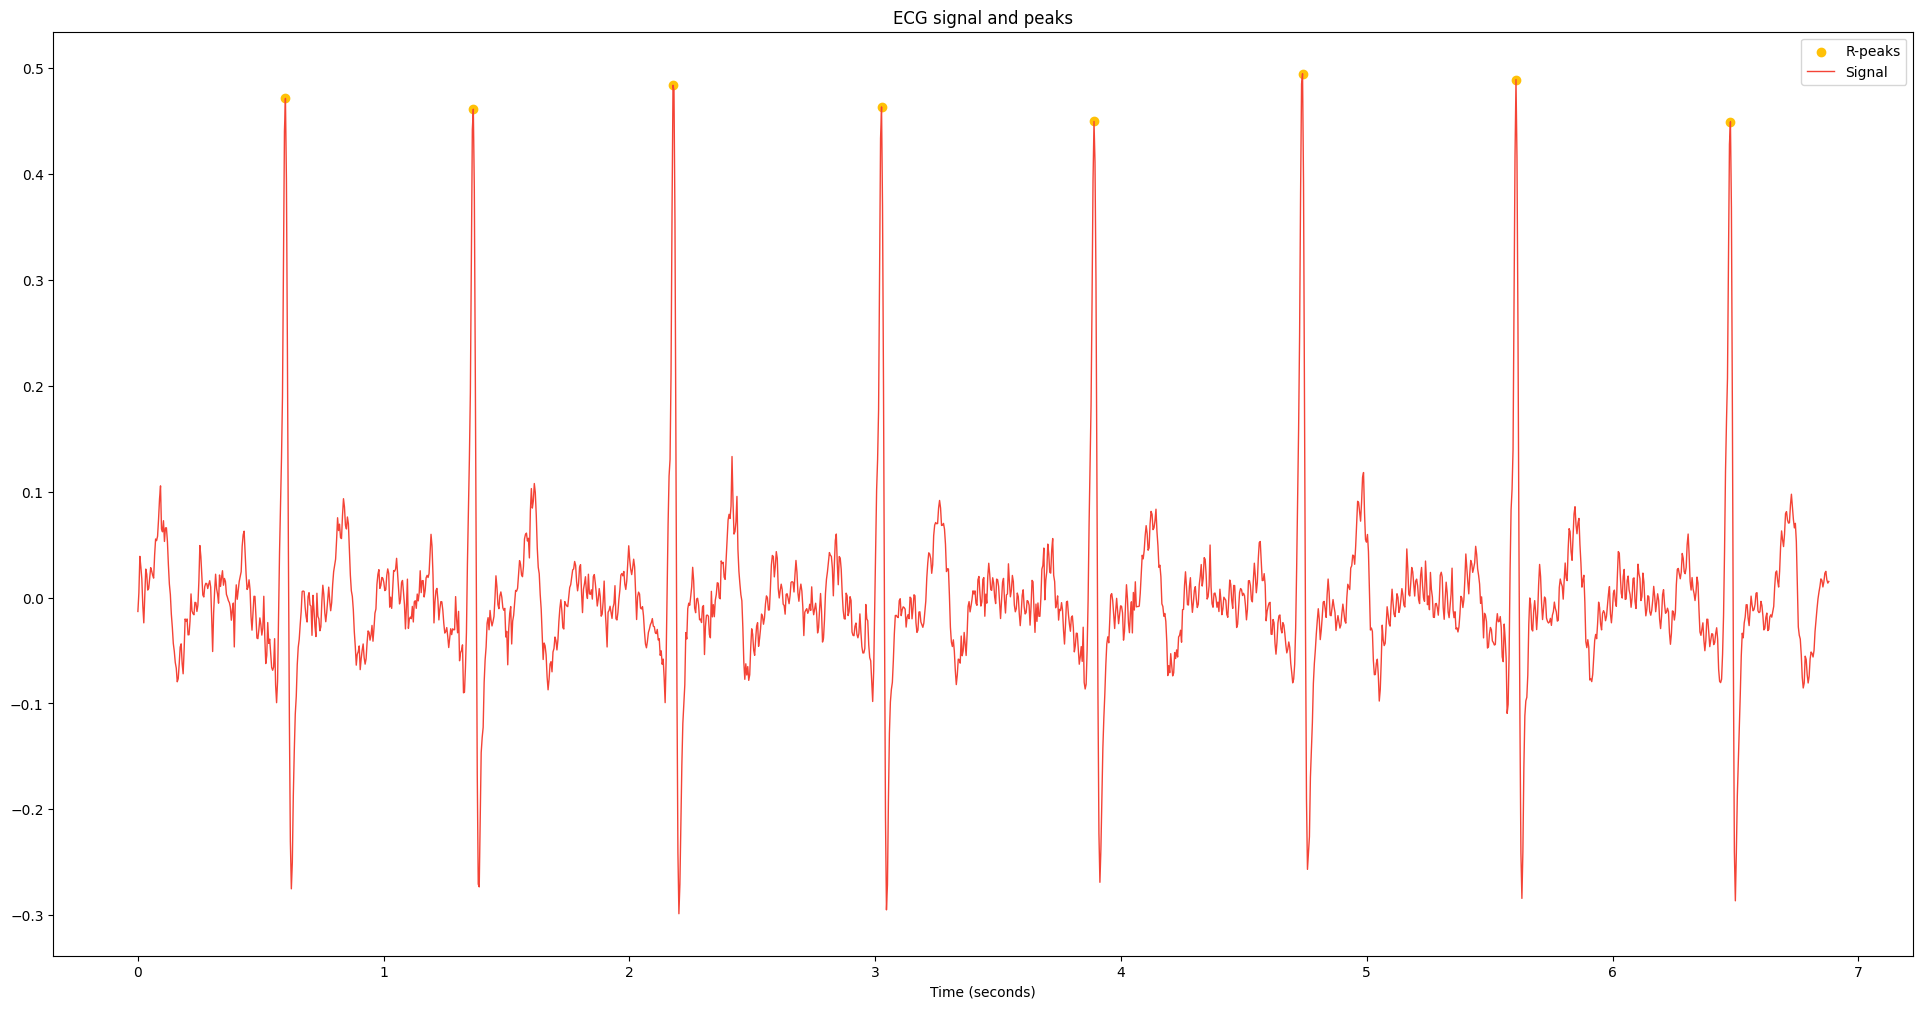

In [68]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the .txt file into a DataFrame
data = pd.read_csv("ecg_data.txt", delimiter="\t")

print(data.head())

'''
 0.231875
0  0.238750
1  0.270625
2  0.469375
3  0.668750
4  0.963750
      ECG_R_Peaks
0               0
1               0
2               0
3               0
4               0
...           ...
7494            0
7495            0
7496            0
7497            0
7498            0

[7499 rows x 1 columns]
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 197,  379,  559,  740,  920, 1110, 1315, 1527, 1740, 1941, 2147,
       2356, 2562, 2762, 2962, 3162, 3362, 3563, 3773, 3993, 4214, 4424,
       4625, 4831, 5045, 5249, 5445, 5632, 5816, 6020, 6226, 6432, 6647,
       6867, 7084, 7293]), 'ECG_R_Peaks_Uncorrected': array([ 197,  379,  559,  740,  920, 1110, 1315, 1527, 1740, 1941, 2147,
       2356, 2562, 2762, 2962, 3162, 3362, 3563, 3773, 3993, 4214, 4424,
...
       -0.52884615,  0.24038462,  0.38461538, -0.48076923, -0.48076923,
       -0.38461538, -0.14423077,  0.96153846,  0.96153846,  0.        ,
        0.        ,  0.24038462, -0.14423077, -0.38461538, -0.14423077,
        0.24038462]), 'ECG_fixpeaks_c1': 0.13, 'ECG_fixpeaks_c2': 0.17, 'sampling_rate': 150}
        '''
# ecg = nk.ecg_simulate(duration=15, sampling_rate=250, heart_rate=80)\
ecg = data.values[:, 0]
# ecg = nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985")

ecg = ecg[280:2000]
# ecg[600:950] = ecg[600:950] + np.random.normal(0, 0.6, 350)

ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="vg")
signals, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True, show=True)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)

# plt.plot(ecg)
# plt.scatter(info["ECG_R_Peaks"], ecg[info["ECG_R_Peaks"]], color="red")

# ecg_sim = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80, noise = 0.05)
# plt.plot(ecg_sim[:1000])
# plt.show()
# plt.plot(ecg[1000:1500])
# plt.show()

# qrs_epochs = nk.ecg_segment(ecg, rpeaks=None, sampling_rate=250, show=True)

# signals, info = nk.ecg_process(ecg, sampling_rate=1000)


# nk.ecg_plot(signals, info)